In [1]:
import os, glob
from tqdm import tqdm
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams.update({'font.size': 20})
# plt.style.use('dark_background')
rc('pdf', fonttype=42)

import funcs

import imp
imp.reload(funcs)

C:\Users\nicol\AppData\Local\Temp\ipykernel_320\1551013304.py:13: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'funcs' from 'W:\\people\\gritti\\IRIR\\code\\fig.5\\funcs.py'>

In [2]:
folder = os.path.join('W:',os.sep,'people','gritti','IRIR','pescoids','stained','p2','tifs_left')

In [18]:
pxl_size = 6.5/16.6 #um/pxl
Z_step = 2 #um.vxl


In [4]:
img_files = glob.glob(os.path.join(folder, '*.tif')) 
img_files.sort()

In [5]:
img_files

['W:\\people\\gritti\\IRIR\\pescoids\\stained\\p2\\tifs_left\\ch0_left.tif',
 'W:\\people\\gritti\\IRIR\\pescoids\\stained\\p2\\tifs_left\\ch1_left.tif']

In [6]:
imgs = [imread(img_file) for img_file in img_files]

In [51]:
imgs[0][p,
                           575:(575+w_size),
                           760:(760+w_size)].shape

(1100, 1100)

In [47]:
shape = imgs[0].shape
surface = 12
min_Z = 30
max_Z = 200

In [59]:

planes = min_Z + np.arange(5)*(max_Z-min_Z)//5

print('depths:', (planes-surface)*Z_step)

depths: [ 36 104 172 240 308]


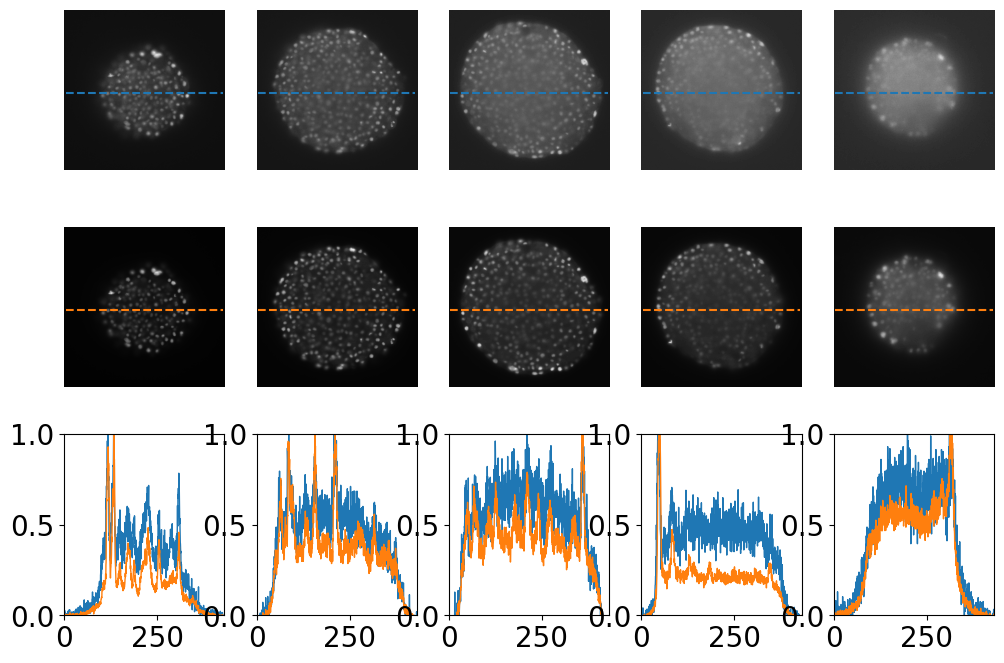

In [58]:
fig, ax = plt.subplots(3,5,figsize=(12,8))


w_size = 1100
pos = 570

i = 0
for p in planes:
    ax[0,i].imshow(imgs[0][p,
                           575:(575+w_size),
                           760:(760+w_size)],
                   cmap='gray')
    ax[1,i].imshow(imgs[1][p,
                           575:(575+w_size),
                           760:(760+w_size)],
                   cmap='gray')
    
    ax[0,i].plot([10,w_size-10],[pos,pos],
                 '--',color='tab:blue')
    ax[1,i].plot([10,w_size-10],[pos,pos],
                 '--',color='tab:orange')
    
    gfp_line = imgs[0][p,575+pos,760:(760+w_size)]
    ir2_line = imgs[1][p,575+pos,760:(760+w_size)]
    
    gfp_line = (gfp_line-np.percentile(gfp_line,10))/(np.percentile(gfp_line,99.9)-np.percentile(gfp_line,10))
    ir2_line = (ir2_line-np.percentile(ir2_line,10))/(np.percentile(ir2_line,99.9)-np.percentile(ir2_line,10))
    
    ax[2,i].plot(
        np.arange(len(gfp_line))*pxl_size, 
        gfp_line,
        c='tab:blue',
        lw=1
    )
    ax[2,i].plot(
        np.arange(len(ir2_line))*pxl_size, 
        ir2_line,
        c='tab:orange',
        lw=1
    )
    i+=1

for a in ax[:2,:].ravel():
    a.set_aspect('equal', adjustable='box')
    a.axis('off')
for a in ax[2,:].ravel():
    a.set_xlim(0,w_size*pxl_size)
    a.set_ylim(0,1)
    
fig.savefig('SupFig10new.pdf',dpi=900)